In [ ]:
# This program attempts to optimize a users portfolio using the Efficient Frontier

In [ ]:
# import some libraries
from pandas_datareader import data as wb
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock symbols in our portfolio
assets = ['TSLA', 'AMZN', 'NFLX','GOOG','AAPL']

In [ ]:
# assign weights to our portfolio 
weights = np.array([0.4, 0.2, 0.1, 0.2,0.1])

In [ ]:
# get the portfolio start date
stockStartDate = '2015-01-01'

In [ ]:
# get the portfolio ending date 
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-14'

In [ ]:
# create a dataframe to store the adjusted close price of the price
df = pd.DataFrame()

# store the adjusted close price pf the stock into the df
for stock in assets : 
  df[stock] = wb.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
# show the df
df

,TSLA,AMZN,NFLX,GOOG,AAPL
Date,,,,,
2015-01-02,219.309998,308.519989,49.848572,523.373108,99.945885
2015-01-05,210.089996,302.190002,47.311428,512.463013,97.130241
2015-01-06,211.279999,295.290009,46.501427,500.585632,97.139420
2015-01-07,210.949997,298.420013,46.742859,499.727997,98.501518
2015-01-08,210.619995,300.459991,47.779999,501.303680,102.286186
...,...,...,...,...,...
2020-07-07,1389.859985,3000.120117,493.160004,1485.180054,372.690002
2020-07-08,1365.880005,3081.110107,502.779999,1496.000000,381.369995
2020-07-09,1394.280029,3182.629883,507.760010,1510.989990,383.010010


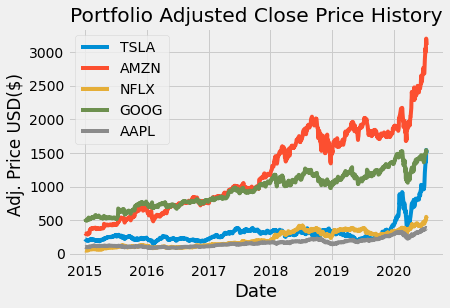

In [ ]:
# visually show the portfolio

title = 'Portfolio Adjusted Close Price History'

#get the stocks
my_stocks = df

# create & plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD($)')
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
# show the daily simple return
returns = df.pct_change()
returns

,TSLA,AMZN,NFLX,GOOG,AAPL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.042041,-0.020517,-0.050897,-0.020846,-0.028172
2015-01-06,0.005664,-0.022833,-0.017121,-0.023177,0.000094
2015-01-07,-0.001562,0.010600,0.005192,-0.001713,0.014022
2015-01-08,-0.001564,0.006836,0.022188,0.003153,0.038422
...,...,...,...,...,...
2020-07-07,0.013328,-0.018619,-0.001316,-0.007033,-0.003103
2020-07-08,-0.017254,0.026996,0.019507,0.007285,0.023290
2020-07-09,0.020792,0.032949,0.009905,0.010020,0.004300


In [ ]:
# create & show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252 # number of trading days for this year
cov_matrix_annual

,TSLA,AMZN,NFLX,GOOG,AAPL
TSLA,0.277441,0.055883,0.071142,0.050181,0.054387
AMZN,0.055883,0.093315,0.067346,0.053395,0.046387
NFLX,0.071142,0.067346,0.180458,0.055896,0.049312
GOOG,0.050181,0.053395,0.055896,0.071824,0.047883
AAPL,0.054387,0.046387,0.049312,0.047883,0.081107


In [ ]:
# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09458257717319143

In [ ]:
# calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.3075428054323356

In [ ]:
# calculate the annual portfolio return
portSimpleAnnualReturn= np.sum(returns.mean() * weights) * 252
portSimpleAnnualReturn

0.4132345295956956

In [ ]:
# show the expected annual return, volatility & variance
percent_var= str(round(port_variance, 2) * 100) +'%'
percent_vol = str(round(port_volatility, 2) * 100)+ '%'
percent_exp = str(round(portSimpleAnnualReturn, 2) * 100)+'%'

print('Expected annual return:', percent_exp)
print('Volatility:', percent_vol)
print('Variance:', percent_var)
print("let's try to have a higher expected return with a lower volatility/ risk")

Expected annual return: 41.0%
Volatility: 31.0%
Variance: 9.0%
let's try to have a higher expected return with a lower volatility/ risk


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# calculate the expected returns & the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio 
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('TSLA', 0.12201), ('AMZN', 0.64253), ('NFLX', 0.21456), ('GOOG', 0.0), ('AAPL', 0.0209)])
Expected annual return: 47.5%
Annual volatility: 29.0%
Sharpe Ratio: 1.57


(0.4749074301978891, 0.28985898536405663, 1.5694094479304659)

In [ ]:
# get the discrete allocation of each share per stock -> how much of those stock can we possess for $ 15,000
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da= DiscreteAllocation(weights, latest_prices,total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'TSLA': 1.0, 'AMZN': 3.0, 'NFLX': 7.0, 'AAPL': 1.0}
Funds remaining: $130.53
